In [2]:
%load_ext autoreload
%autoreload 2

In [1]:
import vehicle_detection as vd

In [3]:
# Load images
cars, notcars = vd.load_images()

In [6]:
colorspace='YCrCb'
orient=9
pix_per_cell=8
cell_per_block=2
hog_channel='ALL'
spatial_size=(16, 16)
hist_bins=16
hist_range=(0, 256)

In [33]:
# colorspace = 'RGB' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
car_features = vd.extract_features(cars, cspace=colorspace, orient=orient,pix_per_cell=pix_per_cell, cell_per_block=cell_per_block,                    hog_channel=hog_channel,spatial_size=spatial_size, hist_bins=hist_bins, hist_range=hist_range)
    
notcar_features = vd.extract_features(notcars, cspace=colorspace, orient=orient,                       pix_per_cell=pix_per_cell, cell_per_block=cell_per_block,
hog_channel=hog_channel,spatial_size=spatial_size, hist_bins=hist_bins, hist_range=hist_range)

In [34]:
print('Using:', orient, 'orientations', pix_per_cell,
          'pixels per cell and', cell_per_block, 'cells per block')
svc, X_scaler = vd.train_test_svm(car_features, notcar_features)

Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 6108
14.53 Seconds to train SVC...
Test Accuracy of SVC =  0.9893


In [77]:
#import pickle 
#pickle.dump(svc, open( "svc.p", "wb" ) )
#pickle.dump(X_scaler, open( "X_scaler.p", "wb" ) )

In [3]:
import pickle
svc = pickle.load(open("svc.p", "rb"))
X_scaler = pickle.load(open("X_scaler.p", "rb"))

In [4]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage.measurements import label
%matplotlib inline
import glob

In [67]:
img = mpimg.imread('./test_images/test6.jpg')

In [70]:
draw_img, bbox_list = vd.find_cars(img, svc=svc, X_scaler=X_scaler, orient=orient,
                                   pix_per_cell=pix_per_cell, cell_per_block=cell_per_block,
                                   spatial_size=spatial_size, hist_bins=hist_bins, scale=1.5)

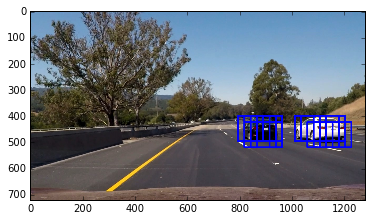

In [71]:
plt.imshow(draw_img)

In [7]:
images = glob.glob('./test_images/*.jpg')
for i, img_path in enumerate(images):
    img = mpimg.imread(img_path)
    draw_img, bbox_list = vd.find_cars(img, svc=svc, X_scaler=X_scaler, orient=orient,
                                   pix_per_cell=pix_per_cell, cell_per_block=cell_per_block,
                                   spatial_size=spatial_size, hist_bins=hist_bins, scale=1.5)
    mpimg.imsave('./output_images/out_'+str(i), draw_img)

In [72]:
heat = np.zeros_like(img[:,:,0]).astype(np.float)

In [73]:
heat = vd.add_heat(heat,bbox_list)

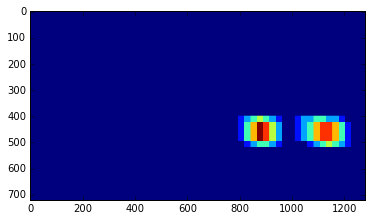

In [74]:
plt.imshow(heat)

In [75]:
heat = vd.apply_threshold(heat,1)

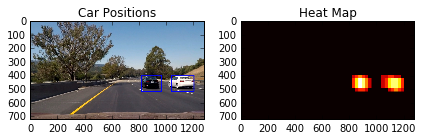

In [76]:
heatmap = np.clip(heat, 0, 255)
labels = label(heatmap)
draw_img = vd.draw_labeled_bboxes(np.copy(img), labels)

fig = plt.figure()
plt.subplot(121)
plt.imshow(draw_img)
plt.title('Car Positions')
plt.subplot(122)
plt.imshow(heatmap, cmap='hot')
plt.title('Heat Map')
fig.tight_layout()

In [8]:
import continous_vehicle_detection as cvd

In [9]:
cvd.process_video('./test_video.mp4', file_out='test_out.mp4')

[MoviePy] >>>> Building video test_out.mp4
[MoviePy] Writing video test_out.mp4


 97%|█████████▋| 38/39 [00:17<00:00,  2.10it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_out.mp4 



In [10]:
cvd.process_video('./project_video.mp4', file_out='project_out.mp4')

[MoviePy] >>>> Building video project_out.mp4
[MoviePy] Writing video project_out.mp4


100%|█████████▉| 1260/1261 [08:55<00:00,  2.33it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_out.mp4 

